In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The idea is to find alpha and real_cutoff, k_cutoff and establish that no increase in either the real or k cutoffs will change the monitored results.
# Usage:
1. Set the linear system size L
2. Set small real_cutoff (2) and range of increasing real_cutoffs (2-12)
3. Set k_cutoff (2) and range of increasing k_cutoffs (2-12)
4. Get Ewald data (data1 has single real_cutoff and variable k_cutoff and data2 vice versa)
5. Plot results for both data1 & data2 [\*] and choose alpha within the plateau (and set best_alpha)
6. Find min k_cutoff for which no additional increase in k_cutoff changes the result [\*\*]
7. Use that k_cutoff as constant to create new set of Ewald results (with variable real_cutoff) - Java
8. Re-set k_cutoff
9. Get data again
10. Find min real_cutoff for which no additional increase in real_cutoff changes the result [\*\*]
11. If the min real_cutoff stays the same (2) - we're done. Otherwise, repeat 8-11 with real_cutoff and k_cutoff alternately


[\*] Only the zz self-interaction is plotted since it converges the slowest.  
[\*\*] Here all monitored interactions are considered.

**To look at Fe8 Ewald convergence, add Fe8 to the directory under convergence_data**

# set parameters (1,2,3,8)

In [2]:
L=6
real_cutoff=2
real_cutoffs=range(2,13)
k_cutoff=6
k_cutoffs=range(2,13)

# get ewald sum convergence data (4,9)

In [25]:
# real_cutoff=2 and variable k_cutoff
data1 = pd.concat([pd.read_csv("convergence_data\\L=6\\%s_%s.txt"%(cutoff,real_cutoff),comment='#', delimiter='\t').assign(k_cutoff=cutoff).assign(real_cutoff=real_cutoff) for cutoff in k_cutoffs],ignore_index=True)
# k_cutoff=2 and variable real_cutoff
data2 = pd.concat([pd.read_csv("convergence_data\\L=6\\%s_%s.txt"%(k_cutoff,cutoff),comment='#', delimiter='\t').assign(real_cutoff=cutoff).assign(k_cutoff=k_cutoff) for cutoff in real_cutoffs],ignore_index=True)

# plot convergence data to find best alpha (where the plateau exists) (5)
these plots are for the zz self interaction which converges the slowest

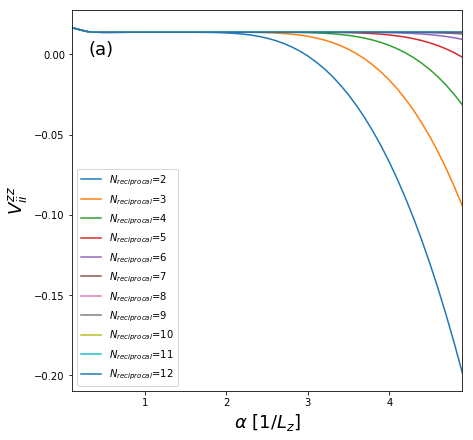

In [54]:
fig, ax = plt.subplots(figsize=(7,7))
for name, group in data1.groupby('k_cutoff'):
    group.plot(x='alpha',y='0z',ax=ax, label=r'$N_{reciprocal}$=%s'%name)
plt.legend()
plt.ylabel(r'$V_{ii}^{zz}$',fontsize=18)
plt.xlabel(r'$\alpha$ $[1/L_z]$',fontsize=18)
plt.text(0.3,0.0,'(a)',fontsize=18)
fig.savefig('ewald_figures\\ewald1.eps',format='eps')
plt.show()

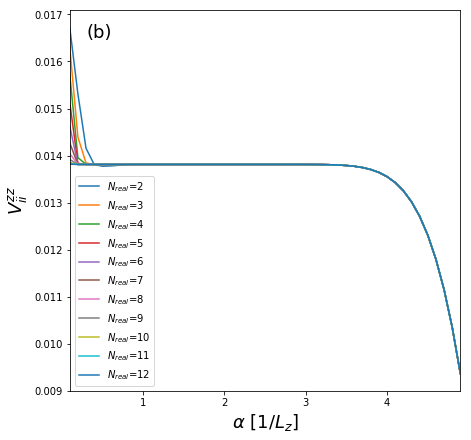

In [55]:
fig, ax = plt.subplots(figsize=(7,7))
for name, group in data2.groupby('real_cutoff'):
    group.plot(x='alpha',y='0z',ax=ax, label=r'$N_{real}$=%s'%name)
plt.legend()
plt.ylabel(r'$V_{ii}^{zz}$',fontsize=18)
plt.xlabel(r'$\alpha$ $[1/L_z]$',fontsize=18)
plt.text(0.3,0.0165,'(b)',fontsize=18)
fig.savefig('ewald_figures\\ewald2.eps',format='eps')
plt.show()

# optimal alpha is chosen as 2.0 (5)

In [87]:
best_alpha=2.0

# find min k_cutoff after which all values are the same (6)

In [80]:
data1.loc[data1['alpha']==best_alpha].drop(['alpha','k_cutoff'],axis=1)

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,4y,4z,real_cutoff
19,0.0,0.0,0.107195,-3.975186,0.0,-1.391060,3.975186,0.0,-1.391060,0.0,3.975186,-1.391060,0.0,-3.975186,-1.391060,2
68,0.0,0.0,0.110440,-3.975388,0.0,-1.391060,3.975388,0.0,-1.391060,-0.0,3.975388,-1.391060,0.0,-3.975388,-1.391060,2
117,0.0,0.0,0.110501,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
166,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
215,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
264,-0.0,-0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
313,-0.0,-0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
362,-0.0,-0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
411,-0.0,-0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2
460,-0.0,-0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,2


In [81]:
partial_data1=data1.loc[data1['alpha']==best_alpha].drop(['alpha','k_cutoff'],axis=1)

In [82]:
for i in range(len(partial_data1)-1):
    #print(i)
    #print(partial_data1.iloc[i+1:].eq(partial_data1.iloc[i],axis=1))
    if (partial_data1.iloc[i+1:].eq(partial_data1.iloc[i],axis=1)).all(axis=None):
        print("min k_cutoff:")
        print(data1.loc[data1['alpha']==best_alpha].iloc[i]['k_cutoff'])
        break

min k_cutoff:
6.0


# find min real_cutoff after which all values are the same (9,10)

In [96]:
data2.loc[data1['alpha']==best_alpha].drop(['alpha','real_cutoff'],axis=1)

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,4y,4z,k_cutoff
19,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
68,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
117,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
166,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
215,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
264,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
313,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
362,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
411,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6
460,0.0,0.0,0.110502,-3.975391,0.0,-1.391089,3.975391,0.0,-1.391089,-0.0,3.975391,-1.391089,0.0,-3.975391,-1.391089,6


In [117]:
partial_data2=data2.loc[data1['alpha']==best_alpha].drop(['alpha','real_cutoff'],axis=1)

In [118]:
for i in range(len(partial_data2)-1):
    #print(i)
    #print(partial_data1.iloc[i+1:].eq(partial_data1.iloc[i],axis=1))
    if (partial_data2.iloc[i+1:].eq(partial_data2.iloc[i],axis=1)).all(axis=None):
        print("min k_cutoff:")
        print(data2.loc[data2['alpha']==best_alpha].iloc[i]['real_cutoff'])
        break

min k_cutoff:
2.0
